# Healthcare - Persistency of a drug Group Project

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification. 

The main objective is to build a classification model to predict the NTM drug persistence of patients based on several factors.


## Data Import

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('data/Healthcare_dataset.csv')

In [36]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
df_info = pd.read_csv('data/Healthcare_info.csv')

In [7]:
df_info = df_info[['Variable', 'Variable Description']]

In [8]:
# Variables in the dataset
pd.set_option('display.max_colwidth', None)
df_info

,Variable,Variable Description
0,Patient ID,Unique ID of each patient
1,Persistency_Flag,Flag indicating if a patient was persistent or not
2,Age,Age of the patient during their therapy
3,Race,Race of the patient from the patient table
4,Region,Region of the patient from the patient table
5,Ethnicity,Ethnicity of the patient from the patient table
6,Gender,Gender of the patient from the patient table
7,IDN Indicator,Flag indicating patients mapped to IDN
8,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,NTM - T-Score,T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)


## Data Preprocessing

In [9]:
df['Idn_Indicator'].value_counts()

Y    2557
N     867
Name: Idn_Indicator, dtype: int64

In [10]:
len(df['Injectable_Experience_During_Rx'].unique())

2

In [11]:
cols = df.columns

In [12]:
# check boolean cloumns
bool_cols = []
other_cols = []
for i in cols:
    values = df[i].unique()
    if len(values) == 2 and (values[0] == 'Y' or values[0] == 'N'):
        bool_cols.append(i)
    else:
        other_cols.append(i)
bool_cols

['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [13]:
df[other_cols].drop('Persistency_Flag', axis=1)

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Count_Of_Risks
0,P1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,0
1,P2,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0
2,P3,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,2
3,P4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,1
4,P5,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1
3420,P3421,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Non-Adherent,0
3421,P3422,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,7,VLR_LR,>-2.5,HR_VHR,<=-2.5,No change,Worsened,Adherent,1
3422,P3423,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0


In [14]:
df.select_dtypes(exclude='object').describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


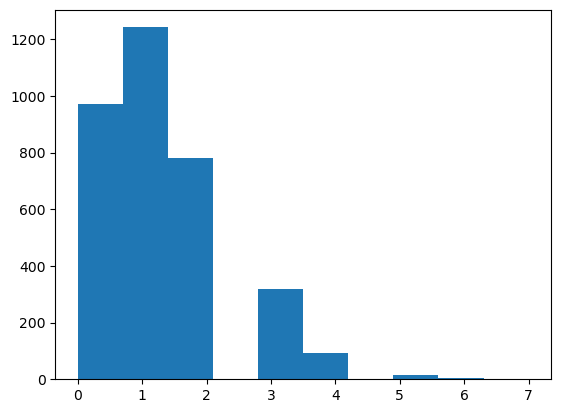

In [15]:
plt.hist(x=df['Count_Of_Risks'])

plt.show()

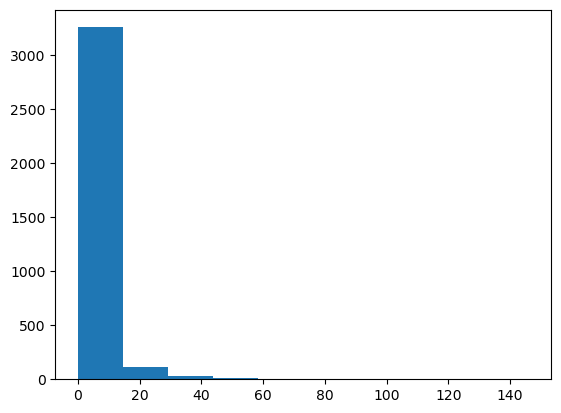

In [16]:
plt.hist(x=df['Dexa_Freq_During_Rx'])

plt.show()

In [17]:
df.Age_Bucket.value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

## Data Transformation

In [18]:
from sklearn import preprocessing

In [39]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [20]:
# cols that have various values
other_cols

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Dexa_Freq_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Count_Of_Risks']

In [21]:
df[other_cols].head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1


In [40]:
# drop unnecessary variables
df = df.drop('Region', axis=1)

In [41]:
# impute unknown value
df.loc[df['Change_Risk_Segment'] == 'Unknown', 'Change_Risk_Segment'] = 'No change'
df.loc[df['Change_T_Score'] == 'Unknown', 'Change_T_Score'] = 'No change'

In [24]:
def label(data, feature):
    data[feature] = label_encoder.fit_transform(data[feature])

In [38]:
def transform_speciality(value):
#     transform medical speciality
    if 'MEDICINE' in value.split(' '):
        return 'MEDICINE'
    elif 'SURGERY' in value.split(' '):
        return 'SURGERY'
    elif df['Ntm_Speciality'].value_counts()[value] < 10 or value == 'Unknown':
        return 'OTHER'
    return value

In [43]:
df['Ntm_Speciality']

0       GENERAL PRACTITIONER
1       GENERAL PRACTITIONER
2       GENERAL PRACTITIONER
3       GENERAL PRACTITIONER
4       GENERAL PRACTITIONER
                ...         
3419    GENERAL PRACTITIONER
3420                   OTHER
3421           ENDOCRINOLOGY
3422                   OTHER
3423                   OTHER
Name: Ntm_Speciality, Length: 3424, dtype: object

In [42]:
# Transform NTM Speciality
df['Ntm_Speciality'] = df['Ntm_Speciality'].apply(lambda x: transform_speciality(x))

In [44]:
# label encoding variables with only two values to 0 and 1
label(df, 'Gender')
label(df, 'Ntm_Specialist_Flag')
label(df, 'Risk_Segment_Prior_Ntm')
label(df, 'Tscore_Bucket_Prior_Ntm')
label(df, 'Adherent_Flag')

In [45]:
ohe = onehot_encoder.fit(df[['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
                                                      'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
                                                       'Change_T_Score','Change_Risk_Segment','Ntm_Speciality']])

In [46]:
# one hot encode other features into 0 or 1

new_df = pd.DataFrame(ohe.transform(df[['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
                                                      'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
                                                       'Change_T_Score','Change_Risk_Segment', 'Ntm_Speciality']] ).toarray(), 
                      columns=ohe.get_feature_names_out())

new_df.head()

,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,...,Ntm_Speciality_MEDICINE,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df = df.join(new_df)

In [48]:
df = df.drop(['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
         'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
         'Change_T_Score','Change_Risk_Segment','Ntm_Speciality'], axis=1)
df.head()

,Persistency_Flag,Gender,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,...,Ntm_Speciality_MEDICINE,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY
0,Persistent,1,GENERAL PRACTITIONER,0,N,N,0,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Non-Persistent,1,GENERAL PRACTITIONER,0,N,N,0,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Non-Persistent,0,GENERAL PRACTITIONER,0,N,N,0,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Non-Persistent,0,GENERAL PRACTITIONER,0,N,Y,0,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Non-Persistent,0,GENERAL PRACTITIONER,0,Y,Y,0,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# label encode other features
for col in bool_cols:
    label(df, col)

In [51]:
# code target variables
df['target'] = np.where(df['Persistency_Flag'] == 'Persistent', 1, 0)
df['target']

0       1
1       0
2       0
3       0
4       0
       ..
3419    1
3420    1
3421    1
3422    0
3423    0
Name: target, Length: 3424, dtype: int32

In [52]:
df.head()

,Persistency_Flag,Gender,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY,target
0,Persistent,1,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Non-Persistent,1,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Non-Persistent,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Non-Persistent,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Non-Persistent,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 99 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Persistency_Flag                                                    3424 non-null   object 
 1   Gender                                                              3424 non-null   int32  
 2   Ntm_Specialist_Flag                                                 3424 non-null   int32  
 3   Gluco_Record_Prior_Ntm                                              3424 non-null   int32  
 4   Gluco_Record_During_Rx                                              3424 non-null   int32  
 5   Dexa_Freq_During_Rx                                                 3424 non-null   int64  
 6   Dexa_During_Rx                                                      3424 non-null   int32  
 7   Frag_Frac_Prior